In [1]:
"""Задание 1.
Загрузите файл HR.csv в pandas dataframe

1.satisfaction_level - Уровень удовлетворенности работой
2.Last_evaluation - Время с момента последней оценки в годах
3.number_projects - Количество проектов, выполненных за время работы
4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5.time_spend_company - Стаж работы в компании в годах
6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left - уволился ли сотрудник
8.promotion_last_5years - повышался ли сотрудник за последние пять лет
9.department - отдел в котором работает сотрудник
10.salary - относительный уровень зарплаты
"""

# import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import seaborn as sns

hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
"""Задание 2.
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
"""

hr_df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


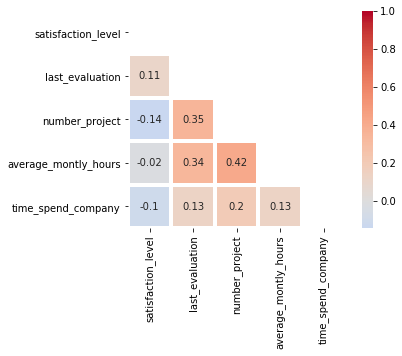

In [3]:
"""Задание 3. 
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные
"""

# Если говорить о скоррелированных данных, то наиболее связаны между собой:
# 1) количество релизованных проектов и среднее количество часов на рабочем месте в месяц (теснота связи 0,42);
# 2) количество релазиованных проектов и время с момента последней оценки в годах (0,35)

# Слабее всего связь у показателей:
# 1) среднее количество часов на рабочем месте в месяц и уровень удовлетворенности работой (обратная связь: -0,02)
# 2) стаж работы в компании в годах и уровень удовлетворенности работой (обратная связь: -0,1)

# Эти данные получены следующим образом. 

# Получаем матрицу корреляции показателей:
profile = (hr_df[['satisfaction_level', 'last_evaluation', 
                  'number_project', 'average_montly_hours', 'time_spend_company']].corr())
print(profile)

# Визуализируем корреляционную матрицу: 
matrix = np.triu(profile)               # задаем маску для построения графика 
sns.heatmap(profile, annot=True, fmt ='.2g', center=0, cmap='coolwarm', linewidths=3,  square=True, mask=matrix)

In [4]:
"""Задание 4.
Рассчитайте сколько сотрудников работает в каждомдепартаменте
"""

the_staff_of_departments = hr_df.groupby('department')['department'].count()
the_staff_of_departments

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

        department
salary            
high          1237
low           7316
medium        6446


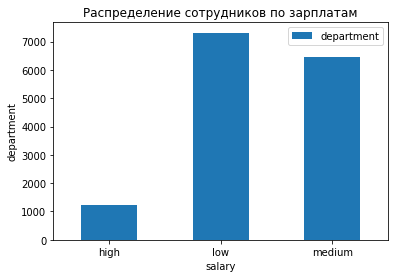

In [5]:
"""Задание 5.
Показать распределение сотрудников по зарплатам
"""

# Из датафрейма получаем 2 столбца, группируя по зарплате и делая расчет: как сотрудники 
# в департаментах распределяются по уровням зарплаты:
# employees_and_salaries = hr_df[['department','salary']].groupby('salary', as_index=False).count()
employees_and_salaries = hr_df[['department','salary']].groupby('salary').count()
print(employees_and_salaries)

employees_and_salaries.loc[['high', 'low', 'medium']].plot(kind="bar",
                                        xlabel='salary',
                                        ylabel='department',
                                        rot=0,
                                        title='Распределение сотрудников по зарплатам')

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


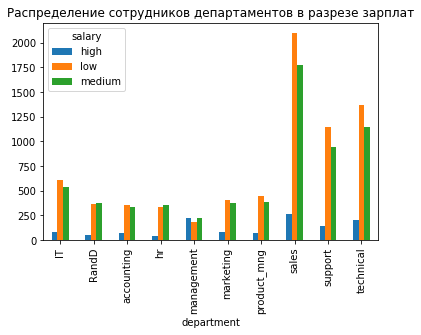

In [43]:
"""Задание 6. 
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
"""

# Вриант реализации через группировку
# salaries_by_dept = hr_df.groupby(['department', 'salary'])['department', 'salary'].count()


# Но мы выберем более компактный вариант - с помощью pivot_table: 
df_pivot_dep_salary = hr_df.pivot_table(values='satisfaction_level', index='department', aggfunc='count', 
                                        columns='salary', fill_value=0).rename({1: 'low', 2: 'mid', 3: 'high'}, axis=1)
print(df_pivot_dep_salary)



df_pivot_dep_salary.plot(kind='bar', title='Распределение сотрудников департаментов в разрезе зарплат')
plt.show()

In [7]:
"""Задача 7.
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
"""

# Проверить гипотезу - означает: выявить зависимость категории уровня зарплаты (salary) 
# от среднего количества часов на рабочем месте в месяц (average_montly_hours) 

# Проведем дискриминантный анализ - 
#     1.1. заменим значения зарплат от строк - к цифре: 0- низкая зарплата, 1 - средняя, 2 - высокая 
#     1.2. распределим значения потраченного времени по заранее известным группам зарплат 
# (маленькая, средняя, высокая): сначала на обучающейся выборке
#     1.3. на основе обучения предскажем результат тестовой выборки 
#     1.4. проверим качество прогноза тестовой выборки  
#     1.5. если качество прогноза высокое, сделаем вывод о взаимосвязи 

# Признаем диапазон точности прогноза, чтобы считать его значимым для работы: 
# accuracy_score>0,01≤0,29 – слабая прогностическая способность,
# accuracy_score>0,30≤0,69 – умеренная погностическая способность,
# accuracy_score>0,70≤1,00 – сильная прогностическая способность


# импортируем LDA-функционал:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1.1. заменяем значения зарплат - строковые на цифровые:
new_values = {
    'low': 0,
    'medium': 1,
    'high': 2
}
hr_df_salary_param = hr_df.replace(new_values)

data_class = hr_df_salary_param['salary'].tolist()

# Определяем выборки: для обучения и тестовую
X_train, X_test, y_train, y_test = train_test_split(hr_df_salary_param[['average_montly_hours', 'salary']], data_class, test_size=0.3)

lda = LinearDiscriminantAnalysis()
# 1.2. обучаем данные:
lda.fit(X_train, y_train)   
# 1.3. делаем прогноз на тестовой выборке:
lda.predict(X_test)                                                   
# 1.4. смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
accuracy_score(y_test, lda.predict(X_test))


0.4922222222222222

In [9]:
# А что говорит дисперсионный анализ? 
# Проведем его, сравнив три датафрейма: низкая, средняя и высокая зарплата. Данный анализ покажет, насколько 
# различаются выборки проведенного рабочего времени в разрезе уровня зарплаты. 
# Если полученная величина превышает уровень значимости в 0,05, то будем считать различия существенными,
# что свидетельствует о качественно различных выборках. В противном случае гипотеза о явном отличии одной величины от другой 
# отвергается, что может свидетельствовать: уровень зарплаты в выборах разный, а проведенное время не столь разнится. 
# Вывод: от количества затраченного на работе времени уровень оплаты труда не зависит либо зависит не в столь значительной мере. 
# Есть и другие влияющие факторы 

# Общий вывод: в половине случаев на значение оплаты труда влияение оказывают иные факторы, нежели проведенное на работе время 

import scipy.stats as stats

hr_df_low = hr_df[hr_df['salary'].isin(['low'])]          # строим выборку имеющих низкий уровень оплаты труда
hr_df_medium = hr_df[hr_df['salary'].isin(['medium'])]    # строим выборку имеющих средний уровень оплаты труда
hr_df_high = hr_df[hr_df['salary'].isin(['high'])]        # строим выборку имеющих высокий уровень оплаты труда


hr_df_salary_low_ = hr_df_low[['average_montly_hours']]        # строим фрейм по признаку удовлетворенности на основе низкооплачиваемых 
hr_df_salary_medium_ = hr_df_medium[['average_montly_hours']]  # аналогично по оплачиваемым на среднем уровне
hr_df_salary_high_ = hr_df_high[['average_montly_hours']]      # аналогично по оплачиваемым на высоком уровне
fvalue, pvalue = stats.f_oneway(hr_df_salary_low_, hr_df_salary_medium_, hr_df_salary_high_) # применяем функцию ДА
print(fvalue, pvalue)

alpha = 0.05  # Уровень значимости


if pvalue > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

[0.45836244] [0.63232712]
Одинаковое распределение (не отвергаем H0)


In [10]:
"""Задание 8. 
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
"""
# Определяем долю сотрудников с повышением среди уволившихся.
# Для этого из датафрейма выбираем уволившихся и по столбцу promotion_last_5years оставляем людей с повышением;
# отношение повышавшихся к общему числу датафрейма даст искомую долю:
hr_df_left = hr_df[hr_df['left'].isin([1])]       # Выбираем уволившихся
hr_df_left.count()     #3571
hr_df_left_promotion_yes = hr_df[hr_df['promotion_last_5years'].isin([1])]     # Выбираем повышавшихся по службе      
hr_df_left_promotion_yes.count()    #319
employee_share_left_promotion_yes = round((hr_df_left_promotion_yes.count() / hr_df_left.count()), 4) * 100
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся: ',  employee_share_left_promotion_yes['promotion_last_5years'], '%')

# Определяем долю сотрудников с повышением среди работающих.
hr_df_working_promotion_yes = hr_df[(hr_df['left'] == 0) & (hr_df['promotion_last_5years'] == 1)] # выбираем работающих и повышавшихся
hr_df_working_total = hr_df[(hr_df['left'] == 0)]          # выбираем уволенных из всего списка людей   
hr_df_working_promotion_yes.promotion_last_5years.count()  # 300
hr_df_working_total.count()     # 11428
employee_share_working_promotion_yes = round((hr_df_working_promotion_yes.promotion_last_5years.count() / hr_df_working_total.count()), 4) * 100
print('Доля сотрудников с повышением за последние 5 лет среди работающих: ',  employee_share_working_promotion_yes['promotion_last_5years'], '%')

# Найдем среднюю степень удовлетворенности среди уволившихся.
satisfaction_degree = hr_df.groupby('left')['satisfaction_level'].mean()
satisfaction_degree_left = round((satisfaction_degree.loc[1]), 2)    
print('Средняя степень удовлетворенности среди уволившихся: ', satisfaction_degree_left)

# Найдем среднюю степень удовлетворенности среди работающих.
satisfaction_degree_work = round((satisfaction_degree.loc[0]), 2) 
print('Средняя степень удовлетворенности среди работающих: ', satisfaction_degree_work)

# Найдем среднее количество проектов среди уволившихся. 
num_project = hr_df.groupby('left')['number_project'].mean()
num_project_left = round((num_project.loc[1]), 2) 
print('Среднее кол-во проектов среди уволившихся: ', num_project_left)

# Найдем среднее количество проектов среди работающих. 
num_project_work = round((num_project.loc[0]), 2) 
print('Среднее кол-во проектов среди работающих: ', num_project_work)




Доля сотрудников с повышением за последние 5 лет среди уволившихся:  8.93 %
Доля сотрудников с повышением за последние 5 лет среди работающих:  2.63 %
Средняя степень удовлетворенности среди уволившихся:  0.44
Средняя степень удовлетворенности среди работающих:  0.67
Среднее кол-во проектов среди уволившихся:  3.86
Среднее кол-во проектов среди работающих:  3.79


In [11]:
"""Задание 9.
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборке
"""

# Вывод: проверка показала высокую точность прогноза на основании двух признаков - уровня удовлетворенности работой и того, 
# трудится ли сотрудник на преедприятии до сих пор

data_class_ = hr_df['left'].tolist()
X_train, X_test, y_train, y_test = train_test_split(hr_df[['satisfaction_level']], data_class_, test_size=0.3)
lda_1 = LinearDiscriminantAnalysis()
# обучаем данные
lda_1.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda_1.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda_1.predict(X_test)]).T
accuracy_score(y_test, lda_1.predict(X_test))

0.768

In [12]:
# Проделаем то же самое на нескольких предикативных признаках

X_train, X_test, y_train, y_test = train_test_split(hr_df[['satisfaction_level', 'time_spend_company']], data_class_, test_size=0.3)
lda_2 = LinearDiscriminantAnalysis()
# обучаем данные
lda_2.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda_2.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda_2.predict(X_test)]).T
accuracy_score(y_test, lda_2.predict(X_test))

# Таким образом, видим, что избранные показатели дают высокую степень точности прогноза, позволяя
# прогнозировать результат в 77 процентах случаев 

0.7608888888888888